In [1]:
#modificationimport numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq, inv
import scipy as sp
from scipy import sparse


**Exercise 1:** Using the standard linear algebra method of this Section, fit
the straight line y = m x + b to the x, y, and σy values for data points 5
through 20 in Table 1 on page 6. That is, ignore the first four data points,
and also ignore the columns for $σ_x$ and $ρ_{xy}$. Make a plot showing the points,
their uncertainties, and the best-fit line. Your plot should end up looking
like Figure 1. What is the standard uncertainty variance $σ_m^2$ on the slope of the line?

In [2]:
#data = np.loadtxt('data (1).txt', dtype = int, usecols = (0,1,2,3)) #, usecols = (0,1,2,3), unpack=True
data1 = np.loadtxt('data (1).txt', dtype = int, usecols = (0,1,2,3), unpack=True)
#print(data)
print(data1.shape)

(4, 20)


In [3]:
x1data=data1[0][4:]
y1data=data1[1][4:]
sigy1data=data1[2][4:]
print(sigy1data.shape)

(16,)


**Doing it with polyfit**

2.2399208316310952 34.04772775754198


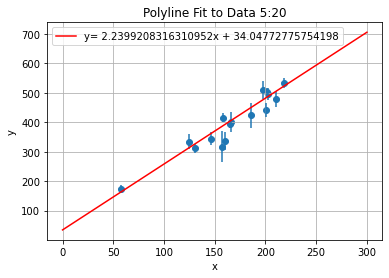

In [4]:
m, b = np.polyfit(x1data, y1data, 1, w=1/sigy1data)
print(m,b)
x1 = np.linspace(0,300,300)
y1 = m*x1+b

plt.plot(x1, y1, "-r", label='y= '+str(m)+'x + '+str(b))  
plt.scatter(x1data, y1data)
plt.errorbar(x1data,y1data,yerr=sigy1data, ls='none') 
plt.title("Polyline Fit to Data 5:20")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [5]:
p, cov = np.polyfit(x1data, y1data, 1, cov=True)
print(cov)
uncertainm,uncertainb =(np.sqrt(np.diag(cov)))
print(uncertainm,uncertainb)

[[ 3.74639140e-02 -6.28457158e+00]
 [-6.28457158e+00  1.11290771e+03]]
0.19355597126922053 33.36027147204117


In [6]:
import inspect
#numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
print(inspect.getsource(np.polyfit))

@array_function_dispatch(_polyfit_dispatcher)
def polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False):
    """
    Least squares polynomial fit.

    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.

    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.

    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fittin

**Doing it myself**

In [26]:
def leastsquares(xdata,ydata, w):
    x = np.asarray(xdata, dtype=float) 
    y = np.asarray(ydata, dtype=float) 
    w=np.asarray(w, dtype=float)
    order = 2
    # set up least squares equation for powers of x
    lhs = np.vander(x, order)
    rhs = y
     # apply weighting
    lhs *= w[:, np.newaxis]
    rhs *= w  

    # scale lhs to improve condition number and solve
    scale = np.sqrt((lhs*lhs).sum(axis=0))
    lhs =lhs / scale
    c, resids, rank, s = lstsq(lhs, rhs, rcond=None)
    c = (c.T/scale).T  # broadcast scale coefficients
    Vbase = (inv(np.dot(lhs.T, lhs)))/(np.outer(scale, scale))
    fac = resids / (len(x) - order)
    V=Vbase*fac
    um,ub =(np.sqrt(np.diag(V)))
    return(c, um, ub)
ans=leastsquares(x1data, y1data, 1/sigy1data)

c1=ans[0]
um=ans[1]
ub=ans[2]
print(c1,um,ub)

m1=c1[0]
b1=c1[1]

[ 2.23992083 34.04772776] 0.12450117990206237 21.07681615343423


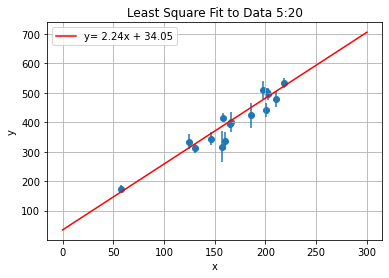

σ² = 0.12450117990206237
y =  2.2399208316310952 ± 0.062250589951031186 *x + 34.04772775754198 ± 10.538408076717115


In [27]:
plt.plot(x1, m1*x1+b1, "-r", label='y= '+str(round(m1, 2))+'x + '+str(round(b1, 2)))  
plt.scatter(x1data, y1data)
plt.errorbar(x1data,y1data,yerr=sigy1data, ls='none') 
plt.title("Least Square Fit to Data 5:20")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.grid()
plt.show()

print(u"\u03C3\u00b2 =", um)#\u00bm')
print("y = ", m1, u"\u00B1", um/2, "*x +", b1, u"\u00B1", ub/2)

**Exercise 2:** Repeat Exercise 1 but for all the data points in Table 1 on
page 6. Your plot should end up looking like Figure 2. What is the standard
uncertainty variance $σ_m^2$ on the slope of the line? Is there anything you don’t
like about the result? Is there anything different about the new points you
have included beyond those used in Exercise 1?

In [28]:
x2data=data1[0][:]
y2data=data1[1][:]
sigy2data=data1[2][:]
ans=leastsquares(x2data, y2data,sigy2data)

c2=ans[0]
um2=ans[1]
ub2=ans[2]
print(c2,um2,ub2)

m2=c2[0]
b2=c2[1]

[2.88100230e-01 3.99645487e+02] 0.5274174430423343 93.62529697425269


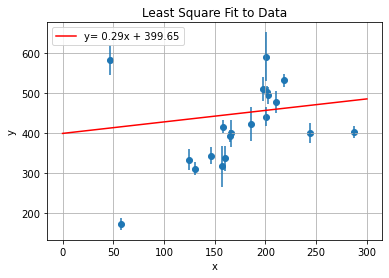

σ² of the slope= 0.5274174430423343
y =  0.2881002298973104 ± 0.26370872152116714 *x + 399.6454866917888 ± 46.812648487126346


In [29]:
plt.plot(x1, m2*x1+b2, "-r", label='y= '+str(round(m2, 2))+'x + '+str(round(b2, 2)))  
plt.scatter(x2data, y2data)
plt.errorbar(x2data,y2data,yerr=sigy2data, ls='none') 
plt.title("Least Square Fit to Data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.grid()
plt.show()
print(u"\u03C3\u00b2 of the slope=", um2)#\u00bm')
print("y = ", m2, u"\u00B1", um2/2, "*x +", b2, u"\u00B1", ub2/2)

The varience is way higher here, because the first four points are 'outliers', messing with the straight line fit of the data. This is generally unwanted.

**Exercise 3:** Generalize the method of this Section to fit a general quadratic
(second order) relationship. Add another column to matrix A containing the
values $x^2_i$, and another element to vector X (call it q). Then re-do Exercise 1
but fitting for and plotting the best quadratic relationship $g(x) = q x^2 + m x + b $.

**Doing it with polyfit**

0.003790679240623569 1.1121796698651079 101.51296902325933
[[ 1.20060990e-05 -3.49817318e-03  2.30163873e-01]
 [-3.49817318e-03  1.05619443e+00 -7.32594467e+01]
 [ 2.30163873e-01 -7.32594467e+01  5.50985281e+03]]
0.0034649818157706383 1.0277132062589271 74.2283827733187


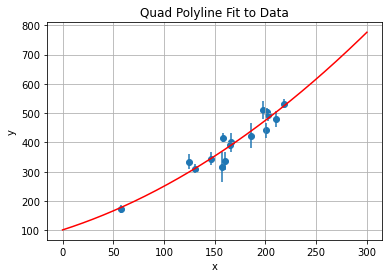

In [30]:
q, m, b = np.polyfit(x1data, y1data, 2)
print(q,m,b)

p, cov = np.polyfit(x1data, y1data, 2, cov=True)
print(cov)
uncertainq, uncertainm,uncertainb =(np.sqrt(np.diag(cov)))
print(uncertainq, uncertainm,uncertainb)


x1 = np.linspace(0,300,300)
y1 = q*x1**2+m*x1+b

plt.plot(x1, y1, "-r")  
plt.scatter(x1data, y1data)
plt.errorbar(x1data,y1data,yerr=sigy1data, ls='none') 
plt.title("Quad Polyline Fit to Data")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

**Doing it myself**

In [31]:
import numpy.core.numeric as NX

def leastsquarequad(xdata,ydata, w):
    x = NX.asarray(xdata) +0.0
    y = NX.asarray(ydata) +0.0
    order = 3
    # set rcond
    rcond = len(x)*np.finfo(x.dtype).eps
    # set up least squares equation for powers of x
    lhs = np.vander(x, order)
    rhs = y
    #apply weighting
    lhs *= w[:, np.newaxis]
    rhs *= w  
    # scale lhs to improve condition number and solve
    scale = NX.sqrt((lhs*lhs).sum(axis=0))
    lhs =lhs / scale
    c, resids, rank, s = lstsq(lhs, rhs, rcond)
    c = (c.T/scale).T  # broadcast scale coefficients
    Vbase = (inv(np.dot(lhs.T, lhs)))/(np.outer(scale, scale))
    fac = resids / (len(x) - order)
    V=Vbase*fac
    uq,um,ub =(np.sqrt(np.diag(V)))
    return(c,uq, um, ub)


In [32]:
ansquad=leastsquarequad(x1data, y1data, 1/sigy1data)


c3=ansquad[0]
uq3=ansquad[1]
um3=ansquad[2]
ub3=ansquad[3]
print(c3,uq3, um3,ub3)

q3=c3[0]
m3=c3[1]
b3=c3[2]
print(q3, m3, b3)

[2.29888841e-03 1.59605045e+00 7.28946265e+01] 0.00235322421344217 0.6707824980990685 45.02161997442122
0.0022988884081216365 1.5960504522746781 72.8946264716661


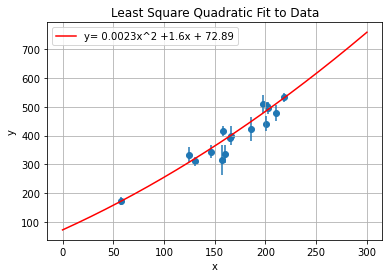

In [33]:

x3 = np.linspace(0,300,300)
y3 = q3*x3**2+m3*x3+b3

plt.plot(x3, y3, "-r", label='y= '+str(round(q3, 4))+'x^2 +'+str(round(m3, 2))+'x + '+str(round(b3, 2)))  
plt.scatter(x1data, y1data)
plt.errorbar(x1data,y1data,yerr=sigy1data, ls='none') 
plt.title("Least Square Quadratic Fit to Data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [34]:
print(u"\u03C3\u00b2 of q=", uq3)
print(u"\u03C3\u00b2 of m=", um3) 
print(u"\u03C3\u00b2 of b=", ub3)
print("y = ", q3, u"\u00B1", uq3/2, "x^2 +", m3, u"\u00B1", um3/2, "*x +", b3, u"\u00B1", ub3/2)

σ² of q= 0.00235322421344217
σ² of m= 0.6707824980990685
σ² of b= 45.02161997442122
y =  0.0022988884081216365 ± 0.001176612106721085 x^2 + 1.5960504522746781 ± 0.33539124904953427 *x + 72.8946264716661 ± 22.51080998721061


**Exercise 8:** Compute the standard uncertainty $σ_m^2$ obtained for the slope of the line found by the standard fit you did in Exercise 2. Now make jackknife (20 trials) and bootstrap estimates for the uncertainty $σ_m^2$. How do the uncertainties compare and which seems most reasonable, given the data and uncertainties on the data?

**Answer**

$σ_m^2$= 0.40190664350491456

slope=  0.6320115359280863 


In [35]:
print("the standard uncertainty from exercise 2 is", um2)

the standard uncertainty from exercise 2 is 0.5274174430423343


In [44]:
x2data=data1[0][:]
y2data=data1[1][:]
y2err=data1[2][:]
ans=leastsquares(x2data, y2data,y2err)

c2=ans[0]
um2=ans[1]
ub2=ans[2]
print(c2,um2,ub2)

m2=c2[0]
b2=c2[1]

[2.88100230e-01 3.99645487e+02] 0.5274174430423343 93.62529697425269


In [54]:
import random
# Bootstrap standard uncertainty variance for slope

bsSlope = np.zeros(100)
for i in range(100):
    xVals=np.zeros(20)
    yVals = np.zeros(20)
    yError = np.zeros(20)
    for j in range(20):
        index = random.randint(0,19)
        xVals[j] = data1[0][index]
        yVals[j] = data1[1][index]
        yError[j] = data1[2][index]
    ans8=leastsquares(xVals, yVals, yError)
    c2add=ans8[0]
    m2add=c2add[0]
    bsSlope[i] +=m2add
print("Bootstrap Slope \n", bsSlope)

Bootstrap Slope 
 [-6.99060259e-01  1.59616588e+00 -3.70676565e-01  1.30727633e+00
  2.23502247e+00  1.14034970e+00  4.87616051e-01 -3.95315391e-02
  2.79867289e+00  1.59300296e+00 -3.74043366e-01 -7.23994707e-01
  1.72432539e-01  1.12865586e+00 -3.51035406e-01  8.38790641e-01
  2.94996816e-01  5.48995443e-01  2.36419057e+00  3.74097432e-01
  1.77167147e+00 -4.34340736e-01  1.88737443e-02 -3.48027389e-01
  7.75614596e-01 -1.41334144e-01 -6.25027362e-01 -1.26203126e-01
  2.98219948e+00  2.27381277e-02 -1.52730824e-01  7.42978150e-02
  5.03001181e-01  3.23415288e+00  1.40452916e+00 -9.62049645e-01
 -3.46029780e-01  2.03145437e-01  7.28191706e-02 -2.42987189e-01
  2.07287764e+00 -3.45215999e-02  1.98559004e+00  3.01284996e-01
 -5.39769901e-01 -4.66329230e-01  9.77354700e-01  6.72144377e-01
  2.92508196e-01 -4.47190098e-01 -2.60962806e-01  1.83518960e+00
 -3.27328720e-01 -1.19889471e-02 -5.07985340e-02  2.54664121e+00
  3.33022420e-01  7.19027812e-01  2.21001913e+00  1.79252568e+00
  2.051

In [55]:
#bsSlope -= m2
bootstrap = np.sum((bsSlope*-m2)**2)/20
bootstrap = np.std(bsSlope)

print(bootstrap)

1.0764141834229468


In [62]:
jkSlope = np.zeros(20)
xVals=x2data
yVals = y2data
yError = y2err
for j in range(20):
    index = random.randint(0,19)
    xVals[j] = data1[0][index]
    yVals[j] = data1[1][index]
    yError[j] = data1[2][index]
    jackX = np.delete(xVals,i)
    jackY = np.delete(yVals,i)
    jackErr = np.delete(yError, i)
    ansj=leastsquares(xVals, yVals, yError)
    cj=ansj[0]
    mj=cj[0]
    jkSlope[i] =mj
print(jkSlope)

jackknife = np.sum((jkSlope-m2)**2)*(19/20)
print(jackknife)

[244 244  47 287 203  58 210 202 198 158 165 201 157 131 166 160 186 125
 218 146]
[244 203  47 287 203  58 210 202 198 158 165 201 157 131 166 160 186 125
 218 146]
[244 203  58 287 203  58 210 202 198 158 165 201 157 131 166 160 186 125
 218 146]
[244 203  58 218 203  58 210 202 198 158 165 201 157 131 166 160 186 125
 218 146]
[244 203  58 218 165  58 210 202 198 158 165 201 157 131 166 160 186 125
 218 146]
[244 203  58 218 165 244 210 202 198 158 165 201 157 131 166 160 186 125
 218 146]
[244 203  58 218 165 244 186 202 198 158 165 201 157 131 166 160 186 125
 218 146]
[244 203  58 218 165 244 186 131 198 158 165 201 157 131 166 160 186 125
 218 146]
[244 203  58 218 165 244 186 131 186 158 165 201 157 131 166 160 186 125
 218 146]
[244 203  58 218 165 244 186 131 186 157 165 201 157 131 166 160 186 125
 218 146]
[244 203  58 218 165 244 186 131 186 157 125 201 157 131 166 160 186 125
 218 146]
[244 203  58 218 165 244 186 131 186 157 125 131 157 131 166 160 186 125
 218 146]
[244

In [49]:
jackknifeSlope = np.ones(20)
for i in range(20):
  xVals[j] = data[0][index]
  yVals[j] = data[1][index]
  yError[j] = data[2][index]
  jackX = np.delete(xVals,i)
  jackY = np.delete(yVals,i)
  jackCov = np.delete(yError,i)
  
  jackknifeSlope[i] = bestFit(jackX, jackY, jackCov)

  
jackknifeSlope -= slope_two

jackknife = np.sum(jackknifeSlope*jackknifeSlope)*(19/20)

print(jackknife)

NameError: name 'data' is not defined

In [42]:
funct= m2*x1+b2

In [ ]:
def jackknife(x, funct):
    """Jackknife estimate of the estimator func"""
    n = len(x)
    idx = np.arange(n)
    return np.sum(funct(x[idx!=i]) for i in range(n))/float(n)

# Jackknife estimate of standard deviation
x = np.random.normal(0, 2, 100)
jackknife(x, np.std)

In [ ]:
def jackknife_uncertainty(x, funct):
    """Jackknife estiamte of the variance of the estimator func."""
    n = len(x)
    idx = np.arange(n)
    j_est = jackknife(x, funct)
    return (n-1)/(n + 0.0) * np.sum((funct(x[idx!=i]) - j_est)**2.0
                                    for i in range(n))

# estimate of the variance of an estimator
jackknife_uncertainty(x, np.std)